# Package Install

In [1]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
if (!require(ggplot2)) install.packages(ggplot2)
library (ggplot2)

Loading required package: ggplot2



In [3]:
set.seed(0)

# 3. modified preferential attachment model

## 3.a
    Produce such an undirected network with 1000 nodes and parameters m = 1, α=1,β=−1,and a=c=d=1,b=0. Plot the degree distribution. What is the power law exponent?
    pa.exp=1
    aging.exp=-1
    zero.deg.appeal = 1
    zero.age.appeal = 0
    deg.coef=1
    age.coef=1

In [4]:
g_pa_age <- sample_pa_age(1000, m=1, pa.exp=1,aging.exp=-1 
              , zero.deg.appeal = 1, zero.age.appeal = 0, 
              deg.coef=1, age.coef=1, directed=F)
degree_dist_age = degree.distribution(g_pa_age)

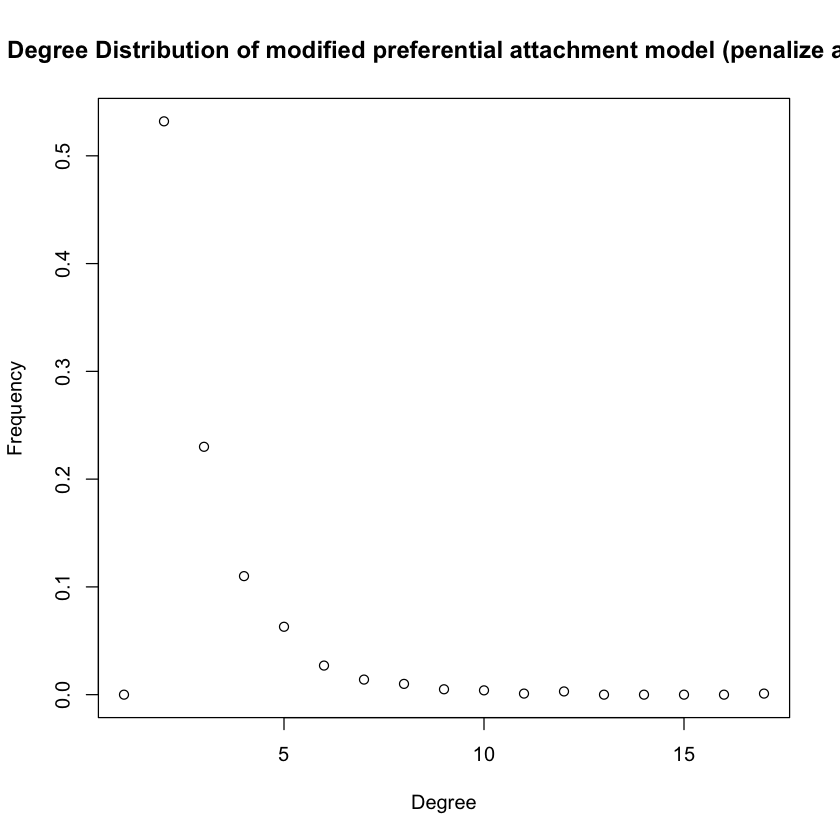

In [5]:
plot(degree_dist_age,main="Degree Distribution of modified preferential attachment model (penalize age)",xlab="Degree",ylab="Frequency")

In [6]:
create_degree_dist_df = function(degree_list){
    df <- data.frame(Reduce(rbind, degree_list))
    colnames(df) <- c( "freq")
    
    degree = seq(1,length(degree_list))
    df_deg_dist <- cbind(df, degree)
    
    return (df_deg_dist)

}
degree_dist_df_age = create_degree_dist_df(degree_dist_age)

df_nonzero_age = degree_dist_df_age[degree_dist_df_age$freq>0,]
lm(log(freq)~log(degree), df_nonzero_age)


Call:
lm(formula = log(freq) ~ log(degree), data = df_nonzero_age)

Coefficients:
(Intercept)  log(degree)  
      2.053       -3.271  


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"log" is not a graphical parameter”


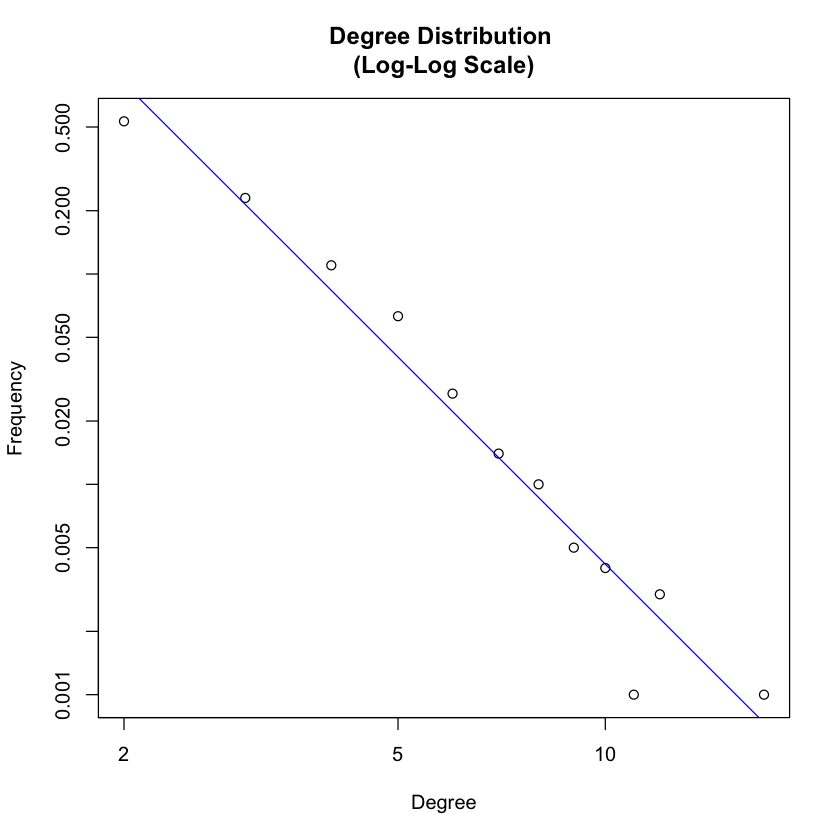

In [16]:
# plot the degree distribution and the log-log scale of the degree distribution (w/linear line)

# x <- seq(1, length(df_nonzero_age$degree))
x <- df_nonzero_age$degree
plot(df_nonzero_age$degree, df_nonzero_age$freq ,  main="Degree Distribution \n(Log-Log Scale)",
     xlab="Degree",ylab="Frequency" , log='xy')

    lines(x, exp(2.053)*x^(-3.271), log='xy', col="blue")


# 1.3.b.
    Use fast greedy method to find the community structure. What is the modularity?

IGRAPH clustering fast greedy, groups: 34, mod: 0.93
+ groups:
  $`1`
   [1]  11  15  18  19  20  21  25  33  34  37  38  44  48  53  62  86  88  90
  [19]  91 117 134 153 169 233 269 283 301 311 363 534 537 552 691 775 776 807
  [37] 825 863 894 901 903 916 917
  
  $`2`
   [1] 171 175 178 180 190 208 215 231 241 247 307 308 317 372 414 422 459 460
  [19] 470 475 479 482 483 485 506 510 550 579 588 681 746 864 872 879 890 953
  [37] 954 968 972 973 981 999
  
  + ... omitted several groups/vertices
 [1] "----- Cluster Sizes ----- 43" "----- Cluster Sizes ----- 42"
 [3] "----- Cluster Sizes ----- 42" "----- Cluster Sizes ----- 43"
 [5] "----- Cluster Sizes ----- 37" "----- Cluster Sizes ----- 40"
 [7] "----- Cluster Sizes ----- 39" "----- Cluster Sizes ----- 41"
 [9] "----- Cluster Sizes ----- 38" "----- Cluster Sizes ----- 34"
[11] "----- Cluster Sizes ----- 33" "----- Cluster Sizes ----- 32"
[13] "----- Cluster Sizes ----- 33" "----- Cluster Sizes ----- 35"
[15] "----- Cluster Sizes 

[1] 0.9347846

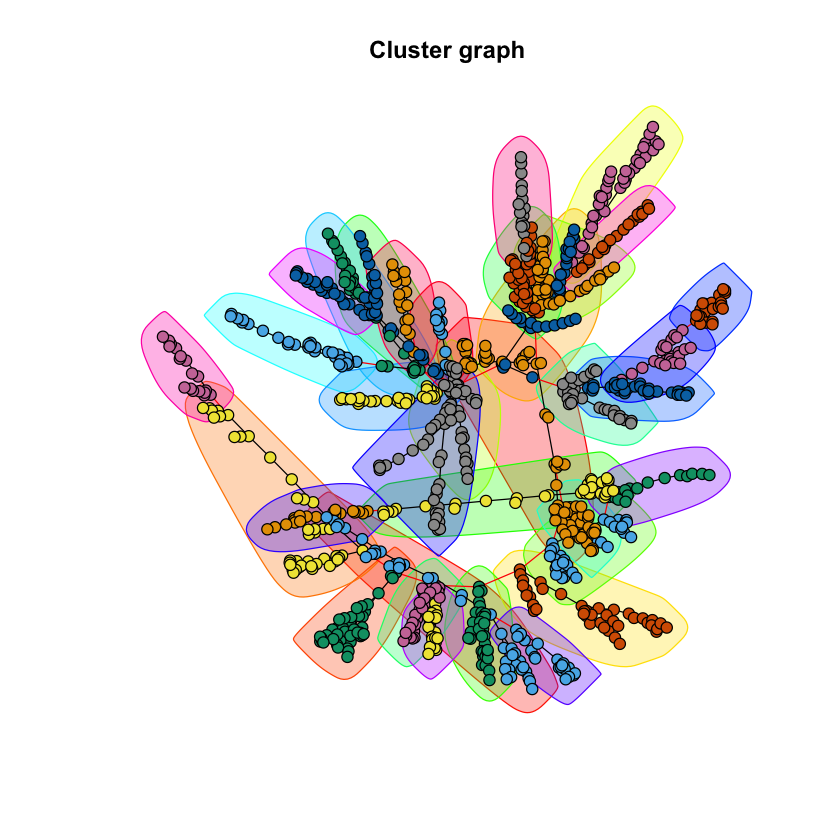

In [14]:
graph=g_pa_age
cluster_fg <- cluster_fast_greedy(graph, modularity = TRUE)
plot(cluster_fg, graph, layout = layout.fruchterman.reingold(graph), edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main=paste(" Cluster graph" ))

print(cluster_fg)  
print(paste("----- Cluster Sizes -----",sizes(cluster_fg)))
modularity(cluster_fg)

[1] 0.9347846

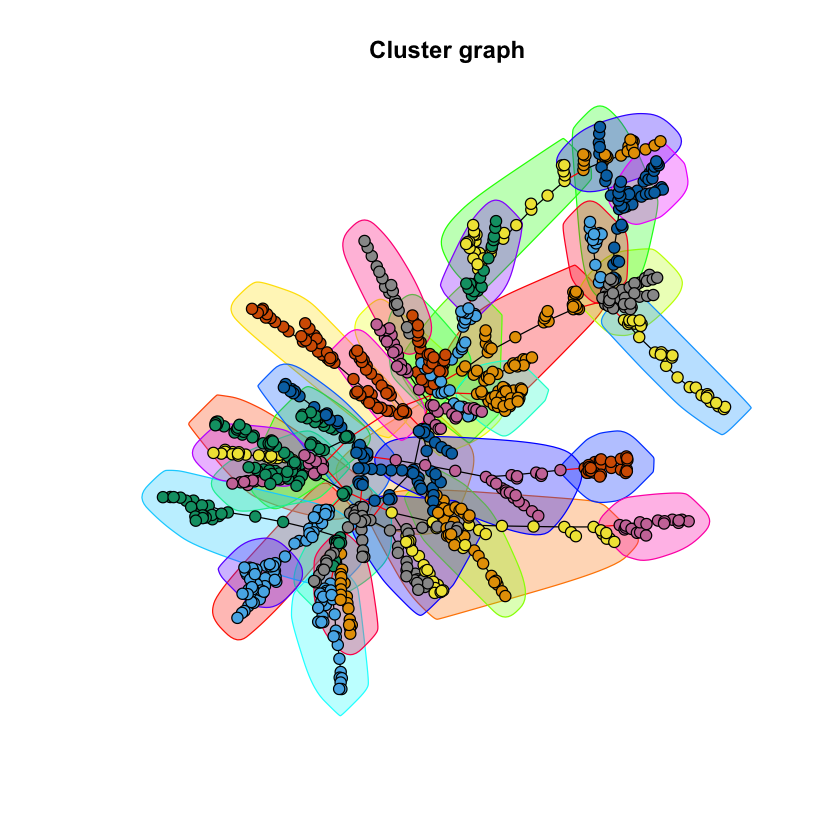

In [9]:
graph=g_pa_age
cluster_fg <- cluster_fast_greedy(graph, modularity = TRUE)
plot(cluster_fg, graph, layout = layout.fruchterman.reingold(graph), edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main=paste(" Cluster graph" ))
    
modularity(graph, membership(cluster_fg))

In [10]:
get_modularity = function(graph){
    cluster_fg <- cluster_fast_greedy(graph, modularity = TRUE)
    plot(cluster_fg, graph, layout = layout.fruchterman.reingold(graph), edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main=paste(" Cluster graph" ))
    
    return (modularity(cluster_fg))
}

[1] 0.9347846

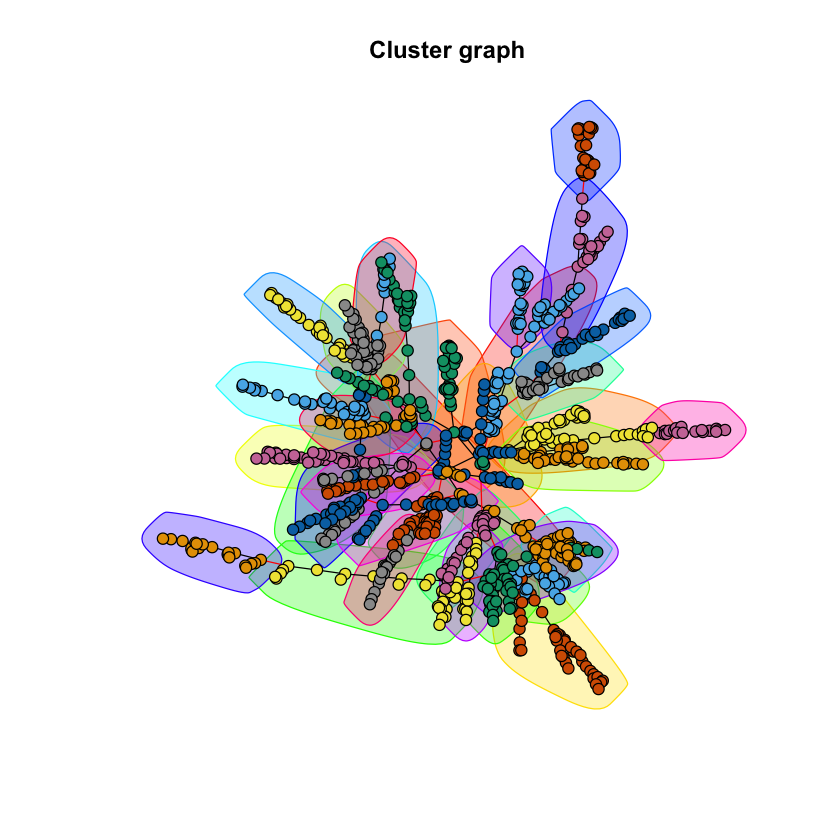

In [11]:
get_modularity(g_pa_age)